# MadMiner particle physics tutorial

# Part 2b: Analyzing events at Delphes level

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

In this second part of the tutorial, we'll generate events and extract the observables and weights from them. You have two options: In this notebook we'll do this with Delphes, in the alternative part 2a we stick to parton level.

## 0. Preparations

Before you execute this notebook, make sure you have working installations of MadGraph, Pythia, and Delphes.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.core import MadMiner
from madminer.delphes import DelphesReader
from madminer.sampling import combine_and_shuffle
from madminer.plotting import plot_distributions


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.DEBUG
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

Please enter here the path to your MG5 root directory. This notebook assumes that you installed Delphes and Pythia through MG5.

## 5. Plot distributions

Let's see what our MC run produced:

13:13 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
13:13 madminer.analysis    INFO    Found 1 parameters
13:13 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
13:13 madminer.analysis    INFO    Did not find nuisance parameters
13:13 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
13:13 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
13:13 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
13:13 madminer.analysis    DEBUG      sm: kapz = 1.00
13:13 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
13:13 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
13:13 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
13:13 madminer.analysis    INFO    Found 35 observables
13:13 madminer.analysis    DEBUG      0 delta_phi_jj
13:13 madminer.analysis    DEBUG      1 delta_eta_jj
13:13 madminer.analysis    DEBUG      2 invmass_jj
13:13 madminer.analysis    DEBUG      3 m4l
13

13:13 madminer.plotting    DEBUG   Plotting panel 12: observable 12, label phi_l1
13:13 madminer.plotting    DEBUG   Ranges for observable phi_l1: min = [-3.1415774822235107, -3.1415774822235107, -3.1415774822235107, -3.1415774822235107, -3.1415774822235107], max = [3.141486883163452, 3.141486883163452, 3.141486883163452, 3.141486883163452, 3.141486883163452]
13:13 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
13:13 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [17.989156887594447, 17.989156887594447, 17.989156887594447, 17.989156887594447, 17.989156887594447], max = [806.4033276014479, 689.3858868922579, 667.3810246370874, 790.0228844127619, 919.5222070208328]
13:13 madminer.plotting    DEBUG   Plotting panel 14: observable 14, label pt_l2
13:13 madminer.plotting    DEBUG   Ranges for observable pt_l2: min = [16.055612564086914, 16.055612564086914, 16.055612564086914, 16.055612564086914, 16.055612564086914], max = [451.6495908873885, 386.79

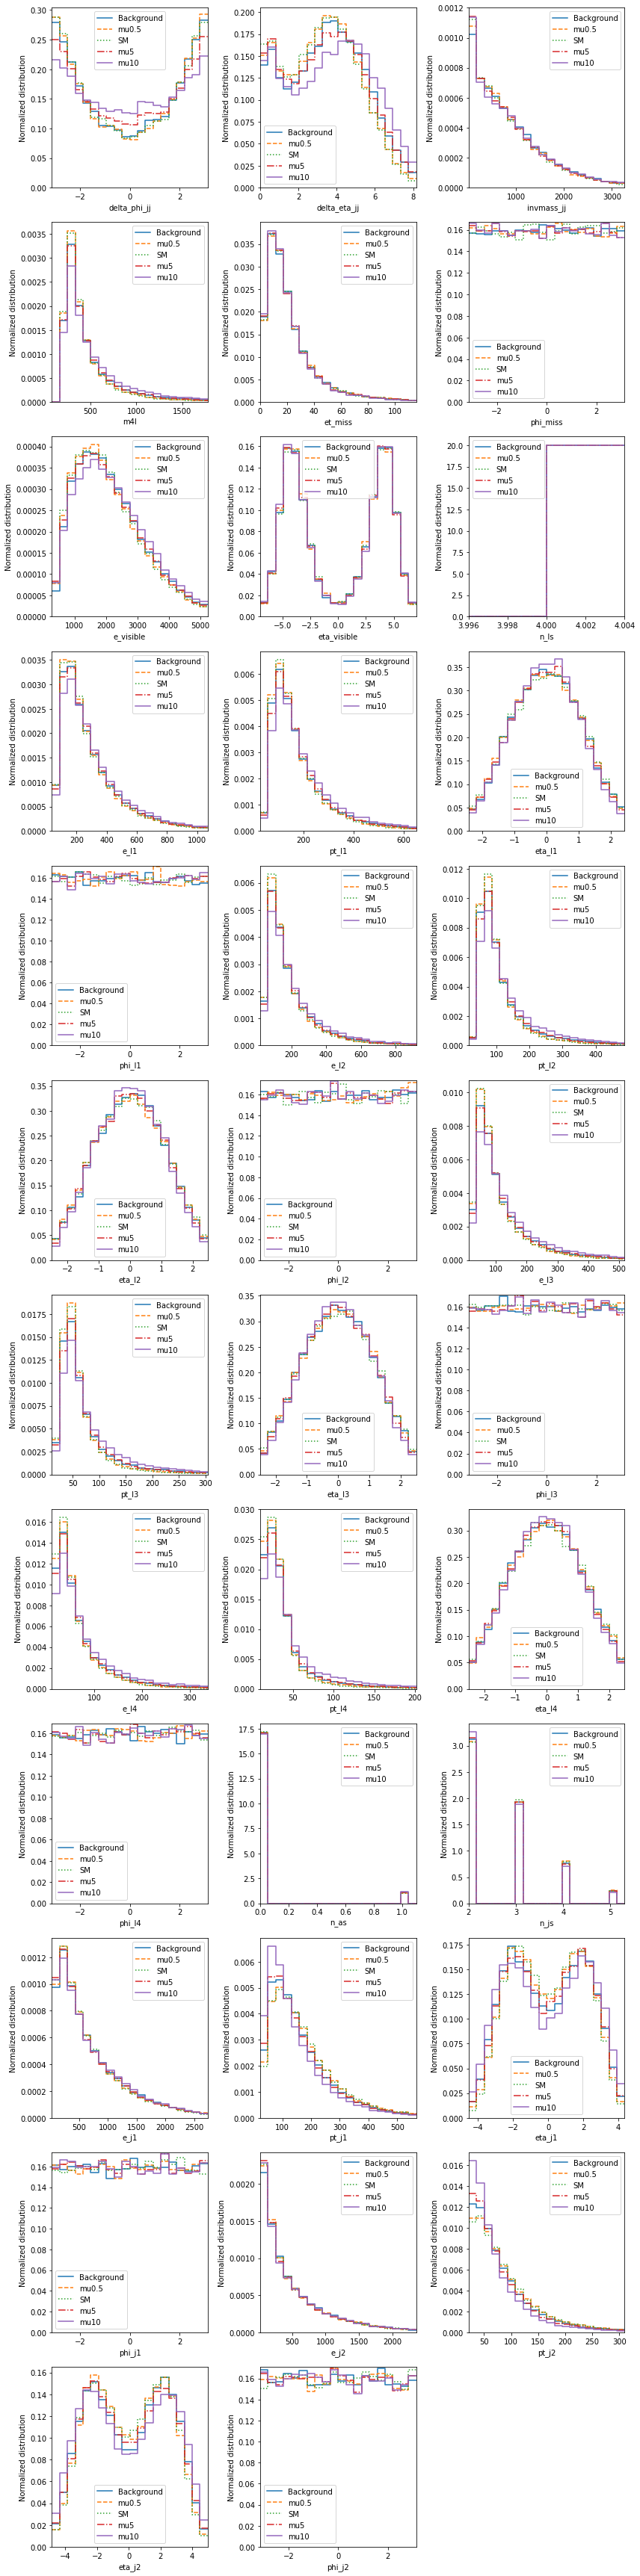

In [3]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=True,
)

13:14 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
13:14 madminer.analysis    INFO    Found 1 parameters
13:14 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (4,), range: (0.0, 2.0))
13:14 madminer.analysis    INFO    Did not find nuisance parameters
13:14 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
13:14 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
13:14 madminer.analysis    DEBUG      0.8_k: kapz = 0.80
13:14 madminer.analysis    DEBUG      sm: kapz = 1.00
13:14 madminer.analysis    DEBUG      1.2_k: kapz = 1.20
13:14 madminer.analysis    DEBUG      1.5_k: kapz = 1.50
13:14 madminer.analysis    DEBUG      1.35_k: kapz = 1.35
13:14 madminer.analysis    INFO    Found 35 observables
13:14 madminer.analysis    DEBUG      0 delta_phi_jj
13:14 madminer.analysis    DEBUG      1 delta_eta_jj
13:14 madminer.analysis    DEBUG      2 invmass_jj
13:14 madminer.analysis    DEBUG      3 m4l
13

13:14 madminer.plotting    DEBUG   Plotting panel 13: observable 13, label e_l2
13:14 madminer.plotting    DEBUG   Ranges for observable e_l2: min = [17.989156887594447, 17.989156887594447, 17.989156887594447, 17.989156887594447, 17.989156887594447], max = [756.043418976619, 676.7069865569373, 669.9133393499607, 761.6403410970444, 880.7627666104568]
13:14 madminer.plotting    DEBUG   Plotting panel 14: observable 14, label pt_l2
13:14 madminer.plotting    DEBUG   Ranges for observable pt_l2: min = [16.055612564086914, 16.055612564086914, 16.055612564086914, 16.055612564086914, 16.055612564086914], max = [450.6930139533012, 388.2438605497007, 380.9293573143442, 463.25989526640336, 555.8082831652762]
13:14 madminer.plotting    DEBUG   Plotting panel 15: observable 15, label eta_l2
13:14 madminer.plotting    DEBUG   Ranges for observable eta_l2: min = [-2.4367625858267083, -2.481599121661716, -2.483067555542884, -2.4112355535141523, -2.3387891908793543], max = [2.400920258597355, 2.440094

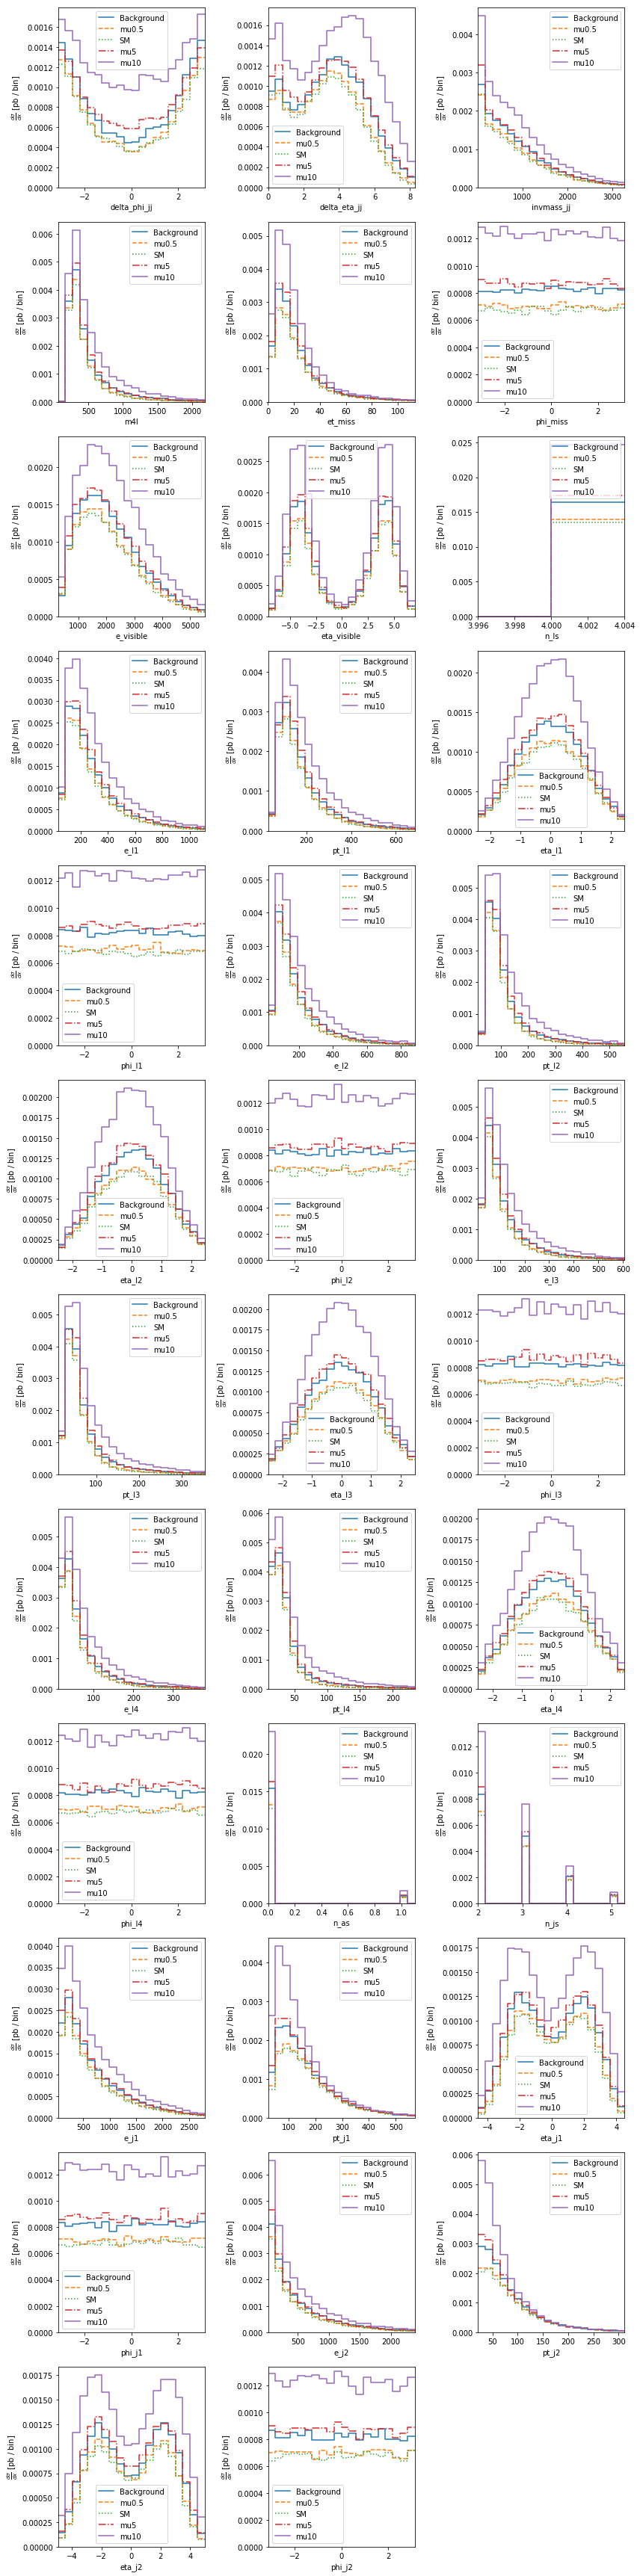

In [4]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', [0.5**0.25], 'sm', [5.**0.25], [10.**0.25]],
    line_labels=['Background', 'mu0.5', 'SM', 'mu5', 'mu10'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=False,
)